# Analiza elekričnih avtomobilov

Najprej bom predstavil enote za posamezni podatek:

- doseg ... *[km]* ... količina kilometrov, ki jih avtomobil prepelje s polno baterijo,
- kapaciteta baterije ... *[kWh]* ... uporabna kapaciteta baterije,
- ucinkovitost ...*[Wh/km]* ... učinkovitost pri standardnih pogojih,
- hitro polnenje ... *[kW]* ... povprečna polnilna moč,
- teza ... *[kg]* ... teža avtomobila,
- vleka ... *[kg]* ... težaj ki jo lahko vleče avto,
- pospesek ... *[s]* ... čas, ki ga porabi avtomobil, da doseže hitrost 100 km/h pri začetni hitrosti 0,
- prtljaga ... *[L]* ... volumen prtljažnika,
- en postanek ... *[km]* ... skupni doseg pri avtocestni hitrosti z enim 15-minutnim postankom za polnjenje,
- price range ... *[€/km]* ... cena na kilometer dosega: pokazatelj vrednosti za denar. Kombinacija dostopnosti in dosega, nižja številka je boljša,
- cena ... *[€]* ... cena avtomobila.

Vse podatke sem zajel iz spletne strani [EV avtomobili](https://ev-database.org/#group=vehicle-group&rs-pr=10000_100000&rs-er=0_1000&rs-ld=0_1000&rs-ac=2_23&rs-dcfc=0_400&rs-ub=10_200&rs-tw=0_2500&rs-ef=100_350&rs-sa=-1_5&rs-w=1000_3500&rs-c=0_5000&rs-y=2010_2030&s=1&p=0-50)

## Analiza podatkov

In [76]:
import pandas as pd
import matplotlib

- Najprej si poglejmo razpredelnico vseh avtomobilov.

In [77]:
avtomobili = pd.read_csv("avtomobili.csv", index_col="id")

In [78]:
avtomobili

,naslov,model,doseg,kapaciteta_baterije,ucinkovitost,hitro_polnenje,teza,vleka,pospesek,prtljaga,en_postanek,price_range,cena
id,,,,,,,,,,,,,
3362,Tesla-Model-Y-Standard-RWD,Model Y Standard RWD,380,60.0,158,110,1981,1600,7.2,952,440,107,40480
3330,Tesla-Model-3-Long-Range-RWD,Model 3 Long Range RWD,580,79.0,136,120,1822,1000,5.2,682,688,83,47899
3333,Tesla-Model-Y-Premium-AWD,Model Y Premium AWD,475,79.0,166,120,2072,1600,4.8,971,556,118,55916
1708,MG-MG4-Electric-64-kWh,MG4 Electric 64 kWh,360,61.7,171,115,1726,500,7.9,363,405,102,36564
3290,BMW-iX3-50-xDrive,iX3 50 xDrive,610,108.7,178,225,2360,2000,4.9,578,742,113,68989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,Citroen-e-SpaceTourer-XS-50-kWh,ë-SpaceTourer XS 50 kWh,185,46.3,250,78,1932,1000,12.1,140,191,275,50880
1350,Peugeot-e-Traveller-Compact-50-kWh,e-Traveller Compact 50 kWh,185,46.3,250,78,1932,1000,12.1,0,191,275,50880
1595,Citroen-e-Jumpy-Combi-M-50-kWh,ë-Jumpy Combi M 50 kWh,185,46.3,250,78,1969,1000,12.1,507,198,270,49974


In [79]:
avtomobili.iloc[4]

naslov                 BMW-iX3-50-xDrive
model                     iX3 50 xDrive 
doseg                                610
kapaciteta_baterije                108.7
ucinkovitost                         178
hitro_polnenje                       225
teza                                2360
vleka                               2000
pospesek                             4.9
prtljaga                             578
en_postanek                          742
price_range                          113
cena                               68989
Name: 3290, dtype: object

- Prva stvar, ki me je zanimala je katerih 10 avtomobilov ima največ dosega.

In [80]:
avtomobili[["naslov", "doseg"]].sort_values("doseg", ascending=False).head(10)

,naslov,doseg
id,,
3273,Lucid-Air-Grand-Touring,720
2193,Mercedes-Benz-EQS-450plus,685
1696,Lucid-Air-Dream-Edition-R,685
1098,Lucid-Air-Dream-Edition-P,670
1316,Lucid-Air-Grand-Touring,665
2194,Mercedes-Benz-EQS-450-4MATIC,655
2196,Mercedes-Benz-EQS-580-4MATIC,640
2195,Mercedes-Benz-EQS-500-4MATIC,640
1483,Mercedes-Benz-EQS-450plus,635


- Vidimo da so med najboljšimi 5-imi kar 4 avtomobili znamke Lucid. Presenetil pa me je podatek, da imajo avtomobili znamke Mercedes Benz tako veliko dosega. Pričakoval sem tudi kakšno Teslo na razpredelnici, ki pa je ni:

- Pa poglejmo, koliko avtomobilov ima dosega za več kot 500 km.

In [81]:
sum(avtomobili.doseg > 500)

122

In [82]:
avtomobili[avtomobili.doseg > 500]

,naslov,model,doseg,kapaciteta_baterije,ucinkovitost,hitro_polnenje,teza,vleka,pospesek,prtljaga,en_postanek,price_range,cena
id,,,,,,,,,,,,,
3330,Tesla-Model-3-Long-Range-RWD,Model 3 Long Range RWD,580,79.0,136,120,1822,1000,5.2,682,688,83,47899
3290,BMW-iX3-50-xDrive,iX3 50 xDrive,610,108.7,178,225,2360,2000,4.9,578,742,113,68989
3331,Tesla-Model-3-Long-Range-AWD,Model 3 Long Range AWD,555,79.0,142,120,1899,1000,4.4,682,654,96,53149
3139,Mercedes-Benz-CLA-250plus,CLA 250+,585,85.0,145,235,2055,1500,6.7,506,763,95,55765
3332,Tesla-Model-3-Performance,Model 3 Performance,515,79.0,153,120,1929,0,3.4,682,603,121,62316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,Mercedes-Benz-EQS-500-4MATIC,EQS 500 4MATIC,590,107.8,183,173,2615,750,4.8,610,655,231,100000
2006,Mercedes-Benz-EQE-350plus,EQE 350+,530,90.6,171,141,2360,750,6.4,430,579,155,82028
1714,Mercedes-Benz-EQE-350,EQE 350,510,89.0,175,120,2385,750,6.4,430,554,158,80798


- Ali je doseg avtomobila večji, če je le ta dražji?

<Axes: xlabel='cena'>

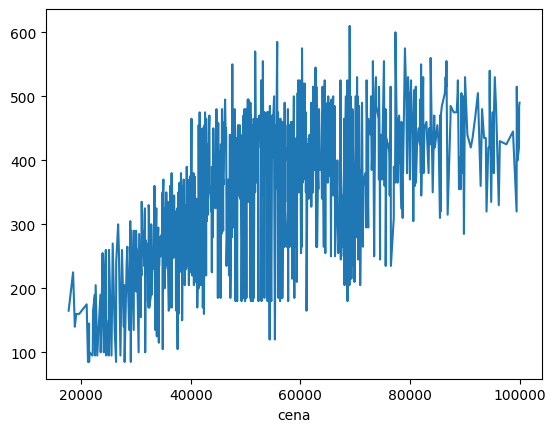

In [83]:
avtomobili.groupby("cena").doseg.mean().plot()

- Kot pričakovano vidimo, da doseg s ceno avtomobila narašča.

- Ali imajo avtomobili s večjo kapaciteto baterije res več dosega?

<Axes: xlabel='kapaciteta_baterije'>

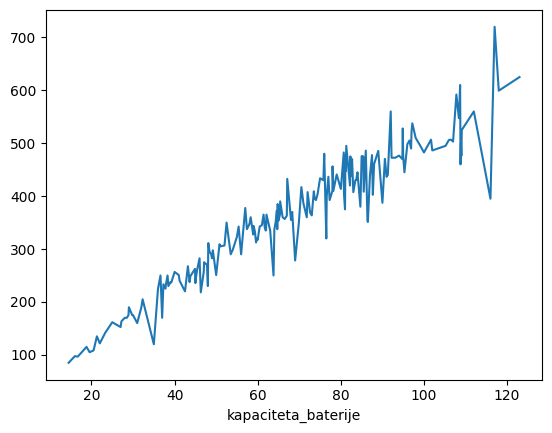

In [84]:
avtomobili.groupby("kapaciteta_baterije").doseg.mean().plot()

- Da, seveda. 

- Ponavadi voznikov električnih avtomobilov odvetujejo vleko prikolice. Vidim pa, da ni pri vseh avtomobilih tako.

In [85]:
avtomobili[["naslov", "teza", "vleka"]].sort_values("vleka")

,naslov,teza,vleka
id,,,
1262,Kia-e-Niro-39-kWh,1667,0
3270,Lucid-Air-Touring,2337,0
1518,CUPRA-Born-170-kW---77-kWh,1946,0
1516,CUPRA-Born-150-kW---58-kWh,1811,0
1285,Fiat-500e-Hatchback-42-kWh,1365,0
...,...,...,...
3382,Porsche-Macan-Turbo-Electric,2480,2500
3292,Lucid-Gravity-Grand-Touring,2684,2500
3111,BMW-iX-M70-xDrive,2655,2500


- Kateri pa so avti, ki ne morejo vleči prikolice?

In [86]:
avtomobili[avtomobili.vleka == 0]

,naslov,model,doseg,kapaciteta_baterije,ucinkovitost,hitro_polnenje,teza,vleka,pospesek,prtljaga,en_postanek,price_range,cena
id,,,,,,,,,,,,,
3332,Tesla-Model-3-Performance,Model 3 Performance,515,79.0,153,120,1929,0,3.4,682,603,121,62316
1285,Fiat-500e-Hatchback-42-kWh,500e Hatchback 42 kWh,235,37.3,159,67,1365,0,9.0,185,261,143,33558
1516,CUPRA-Born-150-kW---58-kWh,Born 150 kW - 58 kWh,350,58.0,166,82,1811,0,7.3,385,375,110,38517
1518,CUPRA-Born-170-kW---77-kWh,Born 170 kW - 77 kWh,450,77.0,171,115,1946,0,7.0,385,488,103,46335
3334,Volkswagen-ID3-Pro-S,ID.3 Pro S,475,79.0,166,135,1957,0,7.1,385,536,88,41611
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,Kia-e-Soul-39-kWh,e-Soul 39 kWh,230,39.2,170,37,1593,0,9.6,315,209,144,33133
1626,Porsche-Taycan-Turbo-S-Sport-Turismo,Taycan Turbo S Sport Turismo,395,83.7,212,216,2400,0,2.8,489,501,487,100000
1543,Mercedes-Benz-EQV-250-Extra-Long,EQV 250 Extra-Long,205,60.0,293,60,2606,0,12.0,1410,193,336,68949


In [87]:
sum(avtomobili.vleka == 0)

386

In [88]:
sum(avtomobili.vleka == 0) / 1140 * 100 

33.85964912280702

- Tretjina električnih avtomobilov ne more vleči prikolice, ker jim to posledično uničuje elektromotorje.

Poglejmo graf, ki prikazuje koliko lahko avtomobili vlečejo glede na kapaciteto baterije.

<Axes: xlabel='kapaciteta_baterije'>

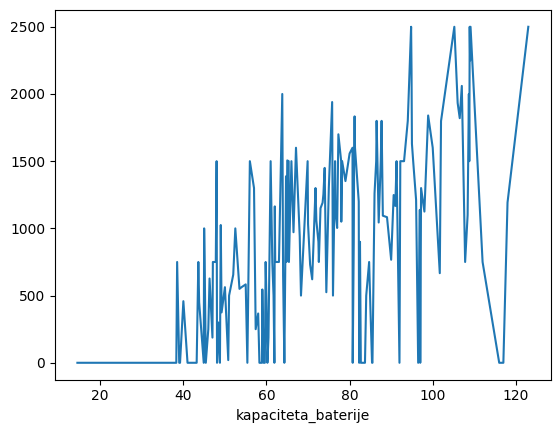

In [89]:
avtomobili.groupby("kapaciteta_baterije").vleka.mean().plot()

- Tudi avtomobili z večjo kapaciteto baterije ne smejo vleči prikolice.

- Če primerjamo pospešek 0-100 *km*/*h* električnega avtomobila in ne električnega bi moral biti pri električnem manjši zaradi stalne moči elektromotorja. Zanima me, katerih 20 avtomobilov najhitreje pospešuje.

In [90]:
avtomobili[["naslov", "pospesek"]].sort_values("pospesek", ascending=True).head(20)

,naslov,pospesek
id,,
3274,Lucid-Air-Sapphire,2.0
2145,Porsche-Taycan-Turbo-GT-Weissach,2.2
2144,Porsche-Taycan-Turbo-GT,2.3
1405,Tesla-Model-S-Plaid,2.4
2109,Porsche-Taycan-Turbo-S-Sport-Turismo,2.4
3384,Tesla-Model-S-Plaid,2.4
2103,Porsche-Taycan-Turbo-S,2.4
2221,Audi-e-tron-GT-RS-performance,2.5
2113,Porsche-Taycan-Turbo-S-Cross-Turismo,2.5


- Ponovno je na prvem mestu avtomobil znamke Lucid. Vidim pa da je v razpredelnici dosti Porsche-jev. Koliko pa je povprečje?

In [91]:
float(avtomobili.pospesek.mean())

7.236140350877194

- Rekel bi, da je to kar hitro za povprečje

<Axes: xlabel='pospesek'>

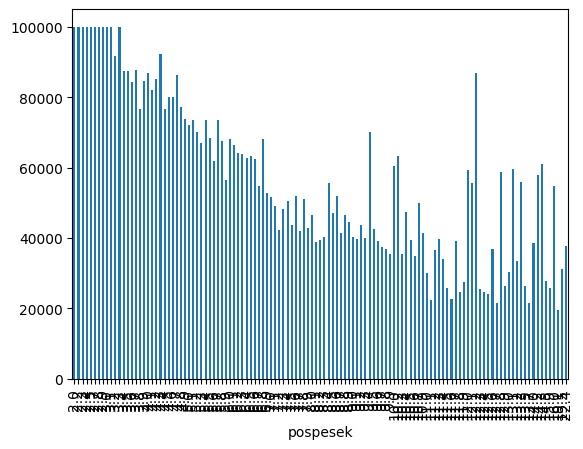

In [92]:
avtomobili.groupby("pospesek").cena.mean().plot.bar()

- Vidimo, da so dražji avtomobili hitrejši, razen določenih izjem.

- Pa poglejmo kakšen volumen prtljaznika imajo avtomobili.

In [93]:
avtomobili[["naslov", "teza", "prtljaga"]]

,naslov,teza,prtljaga
id,,,
3362,Tesla-Model-Y-Standard-RWD,1981,952
3330,Tesla-Model-3-Long-Range-RWD,1822,682
3333,Tesla-Model-Y-Premium-AWD,2072,971
1708,MG-MG4-Electric-64-kWh,1726,363
3290,BMW-iX3-50-xDrive,2360,578
...,...,...,...
1340,Citroen-e-SpaceTourer-XS-50-kWh,1932,140
1350,Peugeot-e-Traveller-Compact-50-kWh,1932,0
1595,Citroen-e-Jumpy-Combi-M-50-kWh,1969,507


<Axes: xlabel='teza', ylabel='prtljaga'>

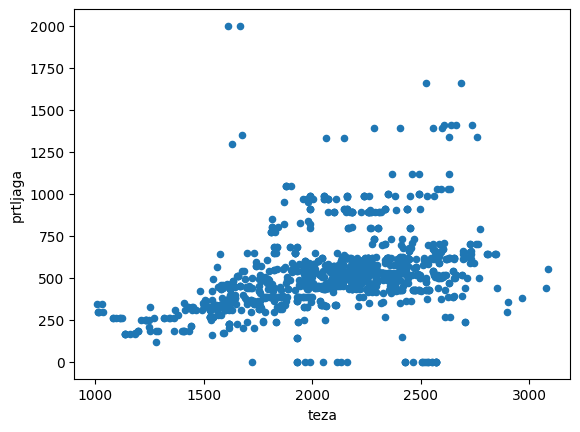

In [94]:
avtomobili.plot.scatter(x="teza", y="prtljaga")

- Vidimo, da se večina giba v povprečju oz. skupaj, le malo je odstopanj

- Sedaj pa recimo, da želim kupiti avto, ki bo od 0-100 *km*/*h* pospešil v manj kot 5 *s*, in bom z njim naredil več kot 600 *km*. Seveda pa nesme bit predrag, torej manj kot 30.000 *€*

In [95]:
avtomobili[(avtomobili.pospesek < 5) & (avtomobili.doseg > 600) & (avtomobili.cena < 30000)]

,naslov,model,doseg,kapaciteta_baterije,ucinkovitost,hitro_polnenje,teza,vleka,pospesek,prtljaga,en_postanek,price_range,cena
id,,,,,,,,,,,,,


- Aha, vidim da tak avto ne obstaja. Ti šment. Priredimo malo kriterije.

In [96]:
avtomobili[(avtomobili.pospesek < 6.5) & (avtomobili.doseg > 300) & (avtomobili.cena < 40000)]


,naslov,model,doseg,kapaciteta_baterije,ucinkovitost,hitro_polnenje,teza,vleka,pospesek,prtljaga,en_postanek,price_range,cena
id,,,,,,,,,,,,,
3147,MG-MGS5--EV-64-kWh,MGS5 EV 64 kWh,365,62.1,170,90,1755,750,6.3,453,387,108,39311
3045,LynkCo-02,02,370,65.0,176,90,1820,1600,5.5,425,399,95,34995


- Moram priznati, da sem pričakoval več avtomobilov, ki bo ustrezalo danim kriterijem.

- Za konec pa si poglejmo še primerjavo s hitrim polnenjem

In [97]:
avtomobili[["naslov", "kapaciteta_baterije", "hitro_polnenje"]]

,naslov,kapaciteta_baterije,hitro_polnenje
id,,,
3362,Tesla-Model-Y-Standard-RWD,60.0,110
3330,Tesla-Model-3-Long-Range-RWD,79.0,120
3333,Tesla-Model-Y-Premium-AWD,79.0,120
1708,MG-MG4-Electric-64-kWh,61.7,115
3290,BMW-iX3-50-xDrive,108.7,225
...,...,...,...
1340,Citroen-e-SpaceTourer-XS-50-kWh,46.3,78
1350,Peugeot-e-Traveller-Compact-50-kWh,46.3,78
1595,Citroen-e-Jumpy-Combi-M-50-kWh,46.3,78


In [98]:
avtomobili[["naslov", "kapaciteta_baterije", "hitro_polnenje"]].sort_values("hitro_polnenje", ascending=False)

,naslov,kapaciteta_baterije,hitro_polnenje
id,,,
3278,XPENG-G9-RWD-Long-Range,92.20,330
3279,XPENG-G9-AWD-Performance,92.20,330
3275,XPENG-G6-RWD-Long-Range,80.00,290
3276,XPENG-G6-AWD-Performance,80.00,290
2221,Audi-e-tron-GT-RS-performance,97.00,281
...,...,...,...
1010,Ford-Focus-Electric,19.55,0
1614,Mercedes-Benz-eVito-Tourer-Extra-Long-41-kWh,35.00,0
1231,Smart-EQ-fortwo-cabrio,16.70,0


- Vidimo, da znamak XPENG prevladuje v tem razdelku.

<Axes: xlabel='kapaciteta_baterije'>

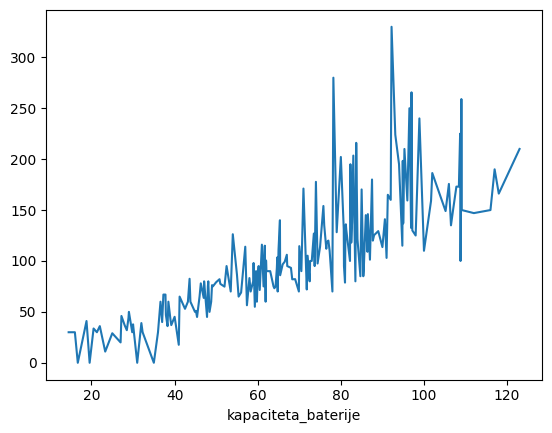

In [99]:
avtomobili.groupby("kapaciteta_baterije").hitro_polnenje.mean().plot()

- Vidimo, da ima manjša kapaciteta baterije tudi manjšo polnilno moč

## Zaključek

Skozi to analizo smo opazili:
- Da ima znamka Lucid avte z največ dosega,
- Da imajo dražji avti nasploh večji doseg
- Da tretjina avtomobilov ne sme vleči prikolice
- Da najbolši avto v pospeških potebuje 2 s od 0-100 km/h
- Da imajo avti znamke XPENG največjo polnilno moč